# Radar observation : reflectivity composite of the old product

The aim of this notebook is to indicate how to read the reflectivity data of the old product. These data range from 01/01/2016 to 30/10/18 included. The radar emits a signal which is reflected by the precipitation. "Reflectivity" is the amount of transmitted power returned to the radar receiver after hitting precipitation, compared to a reference power density at a distance of 1 meter from the radar antenna.

For each pixel is indicated a reflectivity value expressed in dBZ. If the value is missing, the value is 255.

In this notebook, a formula is provided to convert the dBZ into mm.h<sup>-1</sup>.

# Quickstart

In [1]:
from meteonet_toolbox.user_configuration import *
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from matplotlib import colors

First, let's select the zone and date we want to study :

**Note** : if you have a small RAM on your PC, it is possible to load only a part of data (values between min and max indexes).  The maximum possible value about index is 3168 (1 data per 5 min at maximum for a 11 days maximal period -> 12x24x11 = 3168, with : 12 data per hour (frequency = 5 min), 24 hours per day and 11 days

In [2]:
zone = "NW"    # NW or SE
year = 2016    # 2016, 2017 or 2018
month = 8
part_month = 3 # Choice between 1,2,3, as we said earlier each month is divided in 3 parts
#min and max indexes when the dataset is loaded in memory
ind_min = 0
ind_max = 15

Now, we load the data and the coordinates :

In [3]:
fname = "../../data_samples/radar/reflectivity_old_%s_%s_%s.%s.npz" % (zone, str(year),"{:02d}".format(month),str(part_month))
fname_coords = "../../data_samples/radar/radar_coords_%s.npz" % (zone)

d = np.load(fname, allow_pickle=True)
data = d['data'][ind_min:ind_max,:,:]     #reflectivity values
dates = d['dates'][ind_min:ind_max]        #associated dates values
miss_dates = d['miss_dates'][ind_min:ind_max]        #missing dates values

#get the coordinates of the points
coords = np.load(fname_coords, allow_pickle=True)
lat = coords['lats']
lon = coords['lons']

Let's plot quickly the data :

<IPython.core.display.Javascript object>


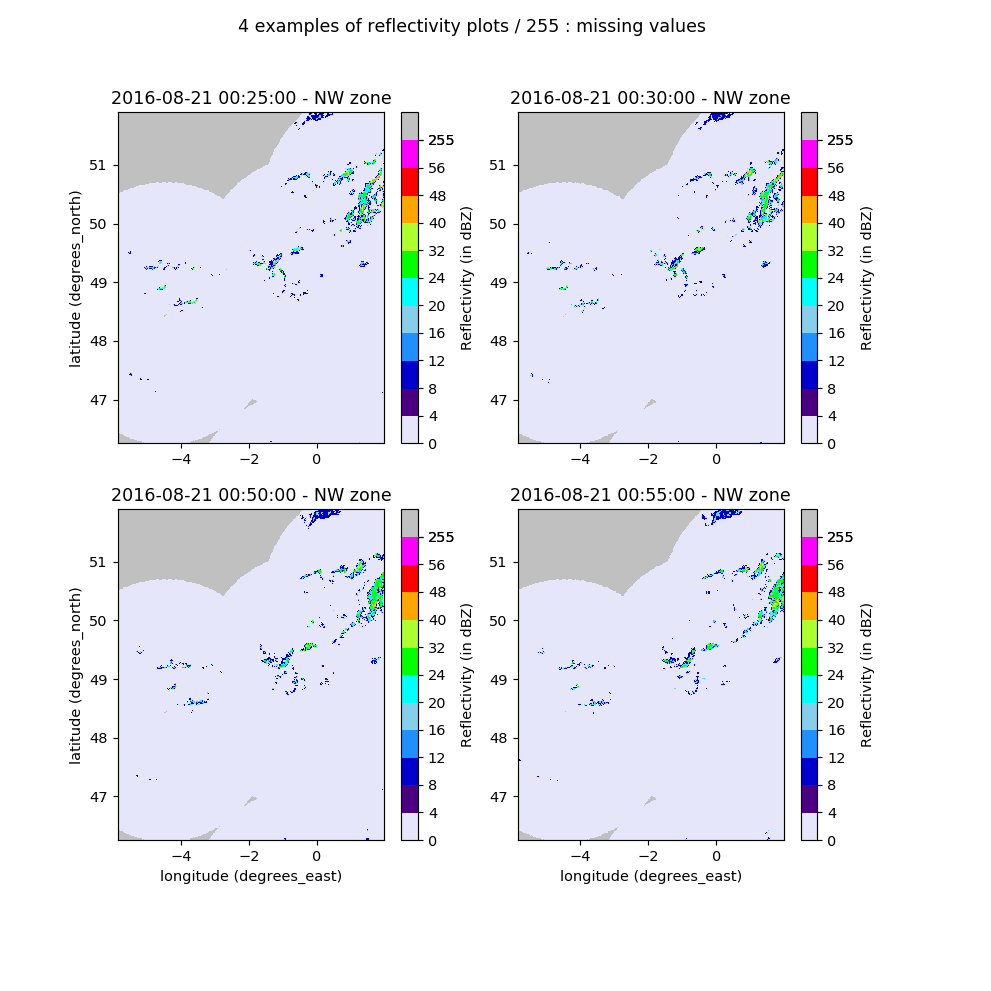

In [4]:
fig = plt.figure(figsize=(9,9))
gs = gridspec.GridSpec(2, 2, figure = fig)
fig.suptitle("4 examples of reflectivity plots" + ' / ' + str(255) +' : missing values', fontsize=12)

# Reflectivity : colorbar definition
if (np.max(data) > 56):
    borne_max = np.max(data)
else:
    borne_max = 56 + 10
cmap = colors.ListedColormap(['lavender','indigo','mediumblue','dodgerblue', 'skyblue','cyan',
                          'olivedrab','lime','greenyellow','orange','red','magenta','pink','silver'])
bounds = [0,4,8,12,16,20,24,32,40,48,56,borne_max,255]
norm = colors.BoundaryNorm(bounds, cmap.N)

# 4 plot examples
ax =  pl.subplot(gs[0, 0])  
p1=ax.pcolormesh(lon, lat, data[0,:,:],cmap=cmap, norm=norm)
ax.set_ylabel('latitude (degrees_north)')
ax.set_title(str(dates[0]) + " - "+  zone + " zone")
pl.colorbar(p1,ax=ax, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, 
            orientation= 'vertical').set_label('Reflectivity (in dBZ)')

ax =  pl.subplot(gs[0, 1])  
p2=ax.pcolormesh(lon, lat, data[1,:,:],cmap=cmap, norm=norm)
ax.set_title(str(dates[1]) + " - "+  zone + " zone")
pl.colorbar(p2,ax=ax, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, 
            orientation= 'vertical').set_label('Reflectivity (in dBZ)')

ax =  pl.subplot(gs[1, 0])  
p3=ax.pcolormesh(lon, lat, data[2,:,:],cmap=cmap, norm=norm)
ax.set_xlabel('longitude (degrees_east)')
ax.set_ylabel('latitude (degrees_north)')
ax.set_title(str(dates[2]) + " - "+  zone + " zone")
pl.colorbar(p3,ax=ax, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, 
            orientation= 'vertical').set_label('Reflectivity (in dBZ)')

ax =  pl.subplot(gs[1, 1])  
p4=ax.pcolormesh(lon, lat, data[3,:,:],cmap=cmap, norm=norm)
ax.set_xlabel('longitude (degrees_east)')
ax.set_title(str(dates[3]) + " - "+  zone + " zone")
pl.colorbar(p4,ax=ax, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, 
            orientation= 'vertical').set_label('Reflectivity (in dBZ)')

plt.show()

# More details

The data are stored per period of 10 or 11 days per geographic zone (each month is separated in 3 files). The zones called 'NW' (for North-West of France) and 'SE' (for South-East of France).
The time step is 5 min (per day, start hour :00h and end hour : 23h55), the spatial resolution, 0.01° (the projection system is EPSG:4326).

Each file contains 3 data categories : 

* `data` : rainfall values
* `dates` : the associated dates to the rainfall values
* `miss_dates` : the dates for which the data are missing

The min and max indexes defined in the second cell (allow to load just take a piece of data if you have a small RAM) apply to these datasets. 

The values are not continuous, there are defined in this way (each value is the inferior bound of each interval) :

* 0 : Z < 8 dBZ 
* 8 : 8 < Z < 16 dBZ     
* 16 : 16 < Z < 20 dBZ 
* ...
* 70 : 70 dBZ < Z 

**To get the coordinates (lat,lon) of the points :**
One `.npz` file contains 2 arrays : one for the latitudes and one for the longitudes.

## Data

Dimensions of the `data` array: 
* time dimension (number of 5 min records) -> can be reduced and determined by min and max indexes when the dataset is loaded in memory (cf second cell)
* Number of points on the y axis : latitude
* Number of points on the x axis : longitude

In [25]:
data.shape

(15, 565, 784)

## Dates

Dimensions of the `dates` array:
* time dimension (number of 5 min records for which there are data)  -> can be reduced and determined by min and max indexes when the dataset is loaded in memory (cf second cell)

In [7]:
dates.shape

(15,)

In [8]:
dates

array([datetime.datetime(2016, 8, 21, 0, 25),
       datetime.datetime(2016, 8, 21, 0, 30),
       datetime.datetime(2016, 8, 21, 0, 50),
       datetime.datetime(2016, 8, 21, 0, 55),
       datetime.datetime(2016, 8, 21, 1, 0),
       datetime.datetime(2016, 8, 21, 1, 5),
       datetime.datetime(2016, 8, 21, 1, 10),
       datetime.datetime(2016, 8, 25, 14, 45),
       datetime.datetime(2016, 8, 25, 14, 50),
       datetime.datetime(2016, 8, 25, 14, 55),
       datetime.datetime(2016, 8, 25, 15, 0),
       datetime.datetime(2016, 8, 25, 15, 10),
       datetime.datetime(2016, 8, 25, 15, 15),
       datetime.datetime(2016, 8, 25, 15, 20),
       datetime.datetime(2016, 8, 25, 15, 40)], dtype=object)

## Missing dates

Dimensions of the `miss_dates` array:
* time dimension (dates for which there are no data) -> can be reduced and determined by min and max indexes when the dataset is loaded in memory (cf second cell)

In [9]:
miss_dates.shape

(15,)

In [10]:
miss_dates

array([datetime.datetime(2016, 8, 21, 0, 0),
       datetime.datetime(2016, 8, 21, 0, 5),
       datetime.datetime(2016, 8, 21, 0, 10),
       datetime.datetime(2016, 8, 21, 0, 15),
       datetime.datetime(2016, 8, 21, 0, 20),
       datetime.datetime(2016, 8, 21, 0, 35),
       datetime.datetime(2016, 8, 21, 0, 40),
       datetime.datetime(2016, 8, 21, 0, 45),
       datetime.datetime(2016, 8, 21, 1, 15),
       datetime.datetime(2016, 8, 21, 1, 20),
       datetime.datetime(2016, 8, 21, 1, 25),
       datetime.datetime(2016, 8, 21, 1, 30),
       datetime.datetime(2016, 8, 21, 1, 35),
       datetime.datetime(2016, 8, 21, 1, 40),
       datetime.datetime(2016, 8, 21, 1, 45)], dtype=object)

## Latitude

In [12]:
lat.shape

(565, 784)

In [13]:
lat

array([[51.896, 51.896, 51.896, ..., 51.896, 51.896, 51.896],
       [51.886, 51.886, 51.886, ..., 51.886, 51.886, 51.886],
       [51.876, 51.876, 51.876, ..., 51.876, 51.876, 51.876],
       ...,
       [46.276, 46.276, 46.276, ..., 46.276, 46.276, 46.276],
       [46.266, 46.266, 46.266, ..., 46.266, 46.266, 46.266],
       [46.256, 46.256, 46.256, ..., 46.256, 46.256, 46.256]])

# Plot with Cartopy

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [15]:
#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude
extent = [lllon, urlon, lllat, urlat]

Index of the chosen 5 min of the decade for the plot with cartopy (cf last cell of the notebook) 

**/!\ 0 <= ind < ind_max-ind_min** 

In [16]:
#index of the chosen 5 min of the decade for the plot with cartopy (cf last cell of the notebook) 
ind = 1  

Plot the reflectivity values for 1 given time step with a basemap

<IPython.core.display.Javascript object>


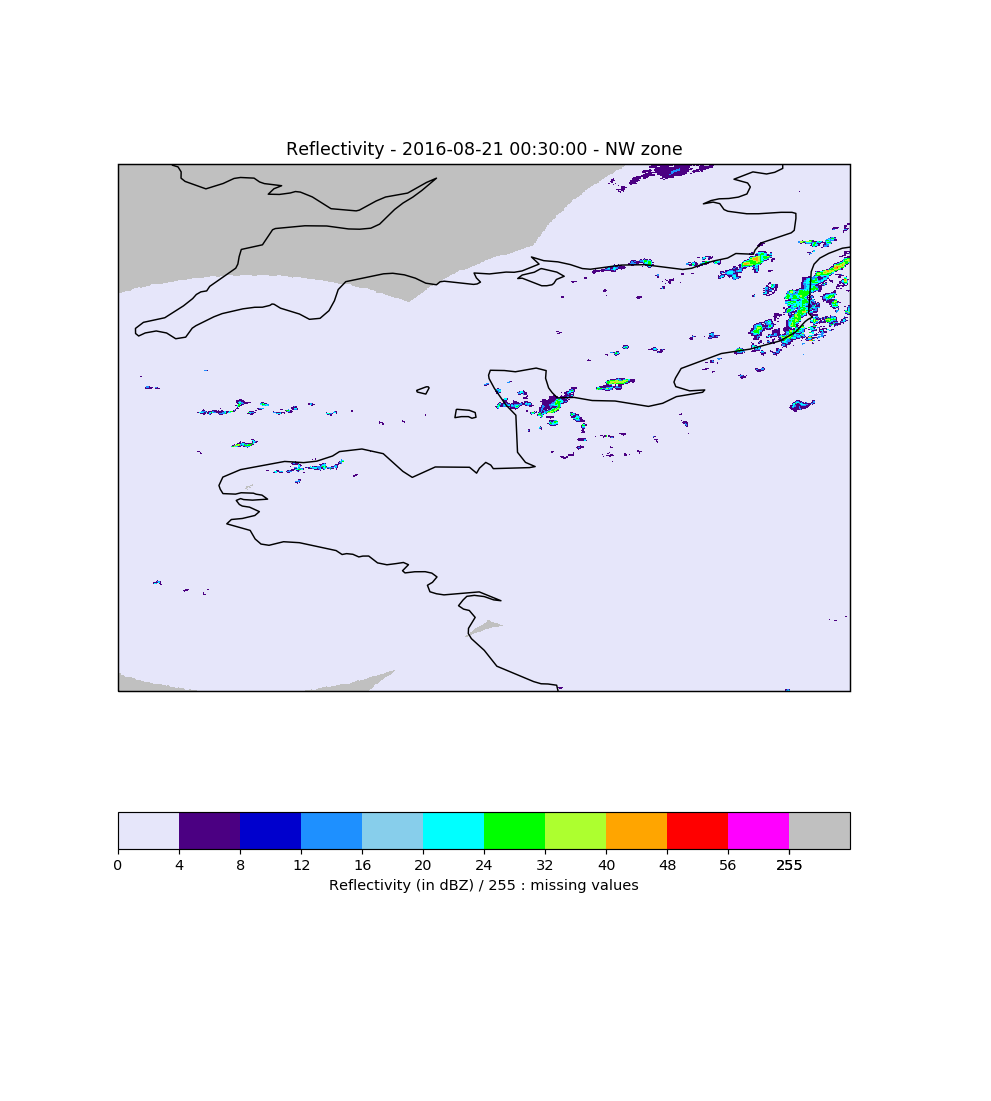

In [18]:
fig = plt.figure(figsize=(9,10))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

#colorbar definition
if (np.max(data) > 56):
    borne_max = np.max(data)
else:
    borne_max = 56 + 10
cmap = colors.ListedColormap(['lavender','indigo','mediumblue','dodgerblue', 'skyblue','cyan',
                          'olivedrab','lime','greenyellow','orange','red','magenta','pink','silver'])
bounds = [0,4,8,12,16,20,24,32,40,48,56,borne_max,255]
norm = colors.BoundaryNorm(bounds, cmap.N)

#plot the data and the background map (coastlines and borders)
img = ax.imshow(data[ind,:,:], interpolation='none', origin='upper',cmap=cmap, norm=norm, extent=extent)
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'horizontal').set_label('Reflectivity (in dBZ) / '+ 
                                                                                                              str(255) +' : missing values')
plt.title("Reflectivity - "+ str(dates[ind]) + " - "+  zone + " zone")
plt.show()

# Convert dBZ into mm/h

In [ ]:
#multiplication coefficient for the graphic representation of rainfall rate (in 1/coeff mm/h)
#/!\### the colorbar is adapted to the coefficient 10 (cf plot at the end)
coeff = 10 

In [19]:
##from dBZ to mm/h : Marshall-Palmer formula
a = 200
b = 1.6

rr = np.zeros((data.shape[0],data.shape[1],data.shape[2]))
rr[data==255]=np.nan
rr[data!=255] = (10**(data[data!=255]/10)/a)**(1/b)

rr_plot = coeff*rr

In [21]:
def plot_mmh(data,coeff, lat,lon, title = "4 examples of rainfall rate plots"):
           
    #plots
    fig, ax = plt.subplots(2, 2,figsize=(9,9))
    fig.suptitle(title, fontsize=16)
    
    #colorbar definition
    #/!\### the scale is adapted to the coefficient 10
    if (np.nanmax(rr_plot) > 3646):
        borne_max = np.nanmax(rr_plot)
    else:
        borne_max = 3646 + 10
    cmap = colors.ListedColormap(['white', 'darkslateblue', 'mediumblue','dodgerblue', 'skyblue','olive','mediumseagreen'
                                      ,'cyan','lime','yellow','khaki','burlywood','orange','brown','red'])
    bounds = [0,2,4,6,12,21,36,65,115,205,365,648,1153,2050,3646,borne_max]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    pl=ax[0,0].pcolormesh(lon, lat, rr_plot[0,:,:],cmap=cmap, norm=norm)
    ax[0,0].set_ylabel('latitude (degrees_north)')
    ax[0,0].set_title(str(dates[0]) + " - "+  zone + " zone")

    pl=ax[0,1].pcolormesh(lon, lat, rr_plot[1,:,:],cmap=cmap, norm=norm)
    ax[0,1].set_title(str(dates[1]) + " - "+  zone + " zone")

    pl=ax[1,0].pcolormesh(lon, lat, rr_plot[2,:,:],cmap=cmap, norm=norm)
    ax[1,0].set_xlabel('longitude (degrees_east)')
    ax[1,0].set_ylabel('latitude (degrees_north)')
    ax[1,0].set_title(str(dates[2]) + " - "+  zone + " zone")

    pl=ax[1,1].pcolormesh(lon, lat, rr_plot[3,:,:],cmap=cmap, norm=norm)
    ax[1,1].set_xlabel('longitude (degrees_east)')
    ax[1,1].set_title(str(dates[3]) + " - "+  zone + " zone")

    cbar = fig.colorbar(pl,ax=ax.ravel().tolist(),cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'vertical').set_label('Rainfall rate (in 1/10 mm/h) / nan : missing values')
    plt.show()
    return rr

<IPython.core.display.Javascript object>


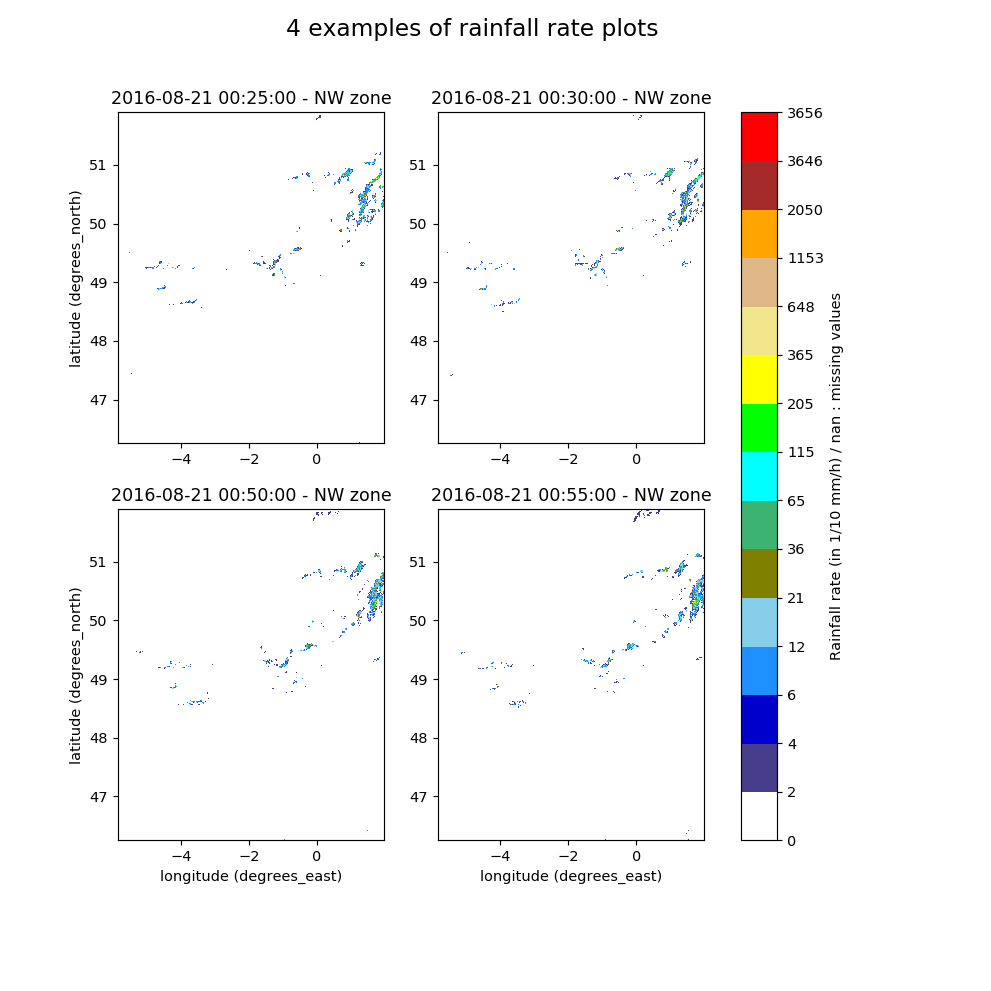

In [22]:
#/!\ these function works only if there are at least 3 dates later than this chosen for the plot with Cartopy (ind variable, cf second cell)
rr = plot_mmh(data,coeff, lat,lon)

Plot with Cartopy :

<IPython.core.display.Javascript object>


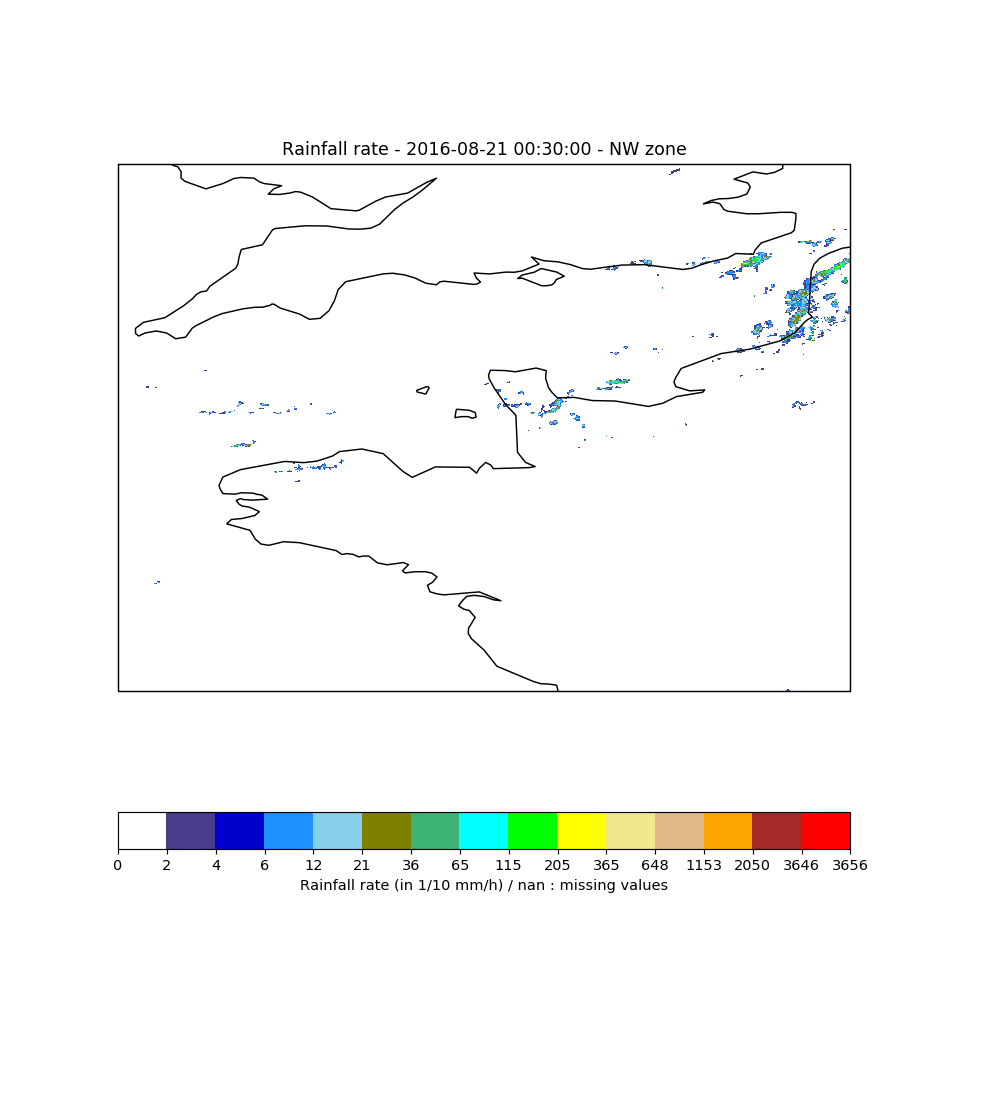

In [24]:
data_plot = coeff*rr

fig = plt.figure(figsize=(9,10))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

#colorbar definition
#/!\### the scale is adapted to the coefficient 10
if (np.nanmax(data_plot) > 3646):
    borne_max = np.nanmax(data_plot)
else:
    borne_max = 3646 + 10
cmap = colors.ListedColormap(['white', 'darkslateblue', 'mediumblue','dodgerblue', 'skyblue','olive','mediumseagreen'
                                  ,'cyan','lime','yellow','khaki','burlywood','orange','brown','red'])
bounds = [0,2,4,6,12,21,36,65,115,205,365,648,1153,2050,3646,borne_max]
norm = colors.BoundaryNorm(bounds, cmap.N)

#plot the data and the background map (coastlines and borders)
img = ax.imshow(data_plot[ind,:,:], interpolation='none', origin='upper',cmap=cmap, norm=norm, extent=extent)
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'horizontal').set_label('Rainfall rate (in 1/10 mm/h) / nan : missing values')
plt.title("Rainfall rate - "+ str(dates[ind]) + " - "+  zone + " zone")
plt.show()